In [129]:
import numpy as np
import math
import torch
from torch.autograd import Variable
import matplotlib.pyplot as pl

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

N = np.random.normal(0, 1, 20)

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
X = np.random.uniform(0,1,20)

#https://www.w3schools.com/python/ref_math_pi.asp
#https://www.geeksforgeeks.org/python-math-sin-function/
Y=[]
for i in range (0,20):
    temp_y=math.sin(2*(math.pi)*X[i]) + 0.01 * N[i]
    Y.append(temp_y)
    
# train test split
x_train = X[:10]
x_test=X[10:20]
#x_test=sorted(x_test)
y_train = Y[:10]
y_test = Y[10:20]
N

X_Line_Space=np.linspace(0,1, num=50)
X_Line_Space


array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [130]:
class Model0:
    def __init__(self):
        self.w00= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w00 
    #0 degree linear regression
    def forward1(self,x):
        return self.w00.data

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w00.data = self.w00.data - 0.01 * self.w00.grad.data

                self.w00.grad.data.zero_()

        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss.data)
        print("w0",self.w00)

        
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss.data)
            
    def drawPredictionLine(self):
        
        pl.scatter(x_test, y_test, color = 'red')
        yp=[]
        for i in range(0,len(X_Line_Space)):
          yp.append(self.w00.data)
        pl.plot(X_Line_Space, yp, color = 'blue')


Final train Loss  tensor([0.6188])
w0 tensor([0.1767], requires_grad=True)
Final test Loss  tensor([0.3588])


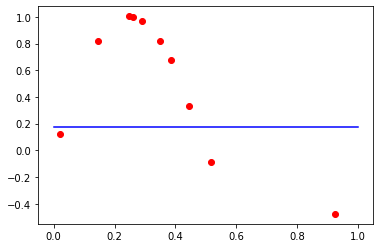

In [131]:
m0=Model0()
m0.trainModel(100)
m0.testModel()
m0.drawPredictionLine()

In [256]:
class Model1:
    def __init__(self):
        self.w01= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w11= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w01 + self.w11 * pow(x,1) 

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w01.data = self.w01.data - 0.01 * self.w01.grad.data
                self.w11.data = self.w11.data - 0.01 * self.w11.grad.data
                
                self.w01.grad.data.zero_()
                self.w11.grad.data.zero_()

                #print("\tgrad: ", x_val, y_val, grad)
                
                # After training
                #print("predict (after training)", self.forward(4))
        self.trainloss=self.trainloss/len(y_train)
        print("w0",self.w01," w1 ",self.w11)
        print("train error",self.trainloss)
        #print("w0=", self.w00, "loss=",l)
        
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        self.testloss=self.testloss/len(y_test)   
        print("test error",self.testloss)    

    def drawPredictionLine(self):
        x_test1=sorted(x_test)
        pl.scatter(x_test, y_test, color = 'red')
        pl.plot(X_Line_Space, (self.w01.data + self.w11.data * X_Line_Space), color = 'blue')
        pl.xlabel("X_test")
        pl.ylabel("y_test")
        #pl.text(0.8,0.75,"M=0")

w0 tensor([0.8546], requires_grad=True)  w1  tensor([-1.4351], requires_grad=True)
train error tensor([0.2420], grad_fn=<DivBackward0>)
test error tensor([0.1740], grad_fn=<DivBackward0>)


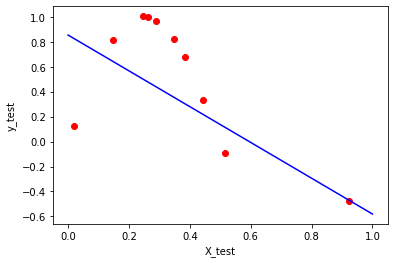

In [257]:
m1=Model1()
m1.trainModel(90)
m1.testModel()
m1.drawPredictionLine()

In [134]:
class Model2:
    def __init__(self):
        self.w02= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w12= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w22= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w02 + self.w12 * pow(x,1) + self.w22 * pow(x,2) 

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w02.data = self.w02.data - 0.01 * self.w02.grad.data
                self.w12.data = self.w12.data - 0.01 * self.w12.grad.data
                self.w22.data = self.w22.data - 0.01 * self.w22.grad.data
                
                self.w02.grad.data.zero_()
                self.w12.grad.data.zero_()
                self.w22.grad.data.zero_()
                
        print("w0",self.w02," w1 ",self.w12," w2 ",self.w22)
        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss)

    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            
    def drawPredictionLine(self):
        x_test1=sorted(x_test)
        pl.scatter(x_test, y_test, color = 'red')
        y_p=self.w02.data+self.w12.data * X_Line_Space + self.w22.data * pow(X_Line_Space,2)
        pl.plot(X_Line_Space, y_p, color = 'blue',label="M=5")
        pl.xlabel("X_test")
        pl.ylabel("y_test")

w0 tensor([1.0484], requires_grad=True)  w1  tensor([-1.1910], requires_grad=True)  w2  tensor([-0.8673], requires_grad=True)
Final train Loss  tensor([0.1946], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.1438], grad_fn=<DivBackward0>)


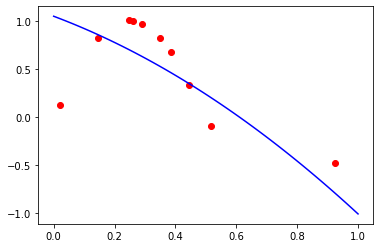

In [245]:
m2=Model2()
m2.trainModel(1000)
m2.testModel()
m2.drawPredictionLine()

In [140]:
class Model3:
    def __init__(self):
        self.w03= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w13= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w23= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w33= Variable(torch.Tensor([1.0]),  requires_grad=True)

        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w03 + self.w13 * pow(x,1) + self.w23 * pow(x,2) + self.w33 * pow(x,3) 
        
    def forward1(self,x):
        return self.w03.data + self.w13.data * pow(x,1) + self.w23.data * pow(x,2) + self.w33.data * pow(x,3) 

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w03.data = self.w03.data - 0.01 * self.w03.grad.data
                self.w13.data = self.w13.data - 0.01 * self.w13.grad.data
                self.w23.data = self.w23.data - 0.01 * self.w23.grad.data
                self.w33.data = self.w33.data - 0.01 * self.w33.grad.data
                
                self.w03.grad.data.zero_()
                self.w13.grad.data.zero_()
                self.w23.grad.data.zero_()
                self.w33.grad.data.zero_()

                #print("\tgrad: ", x_val, y_val, grad)
                
                # After training
                #print("predict (after training)", self.forward(4))
            #self.trainloss=l/len(y_train)
        
        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss)

    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            
    def drawPredictionLine(self):
        x_test1=sorted(x_test)
        pl.scatter(x_test, y_test, color = 'red')
        y_p=self.forward1(X_Line_Space)
        pl.plot(X_Line_Space, y_p, color = 'blue')
        #pl.text(0.8,0.75,"M=0")
        pl.xlabel("X_test")
        pl.ylabel("y_test")

Final train Loss  tensor([0.0061], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.0046], grad_fn=<DivBackward0>)


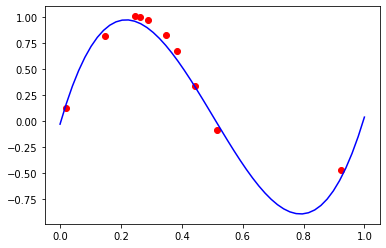

In [142]:
m3=Model3()
m3.trainModel(100000)
m3.testModel()
m3.drawPredictionLine()

In [246]:
class Model4:
    def __init__(self):
        self.w04= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w14= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w24= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w34= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w44= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    def forward(self,x):
        return self.w04 + self.w14 * pow(x,1) + self.w24 * pow(x,2) + self.w34 * pow(x,3) +self.w44 * pow(x,4)

    def forward1(self,x):
        return self.w04.data + self.w14.data * pow(x,1) + self.w24.data * pow(x,2) + self.w34.data * pow(x,3) +self.w44.data * pow(x,4)


    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):

        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w04.data = self.w04.data - 0.01 * self.w04.grad.data
                self.w14.data = self.w14.data - 0.01 * self.w14.grad.data
                self.w24.data = self.w24.data - 0.01 * self.w24.grad.data
                self.w34.data = self.w34.data - 0.01 * self.w34.grad.data
                self.w44.data = self.w44.data - 0.01 * self.w44.grad.data
                
                self.w04.grad.data.zero_()
                self.w14.grad.data.zero_()
                self.w24.grad.data.zero_()
                self.w34.grad.data.zero_()
                self.w44.grad.data.zero_()

                
                #print("\tgrad: ", x_val, y_val, grad)
                
                # After training
                #print("predict (after training)", self.forward(4))
            
        
        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss)
        
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)

    def drawPredictionLine(self):
        x_test1=sorted(x_test)
        pl.scatter(x_test, y_test, color = 'red')
        y_p=self.forward1(X_Line_Space)
        pl.plot(X_Line_Space, y_p, color = 'blue')
        pl.xlabel("X_test")
        pl.ylabel("y_test")

Final train Loss  tensor([0.0049], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.0050], grad_fn=<DivBackward0>)


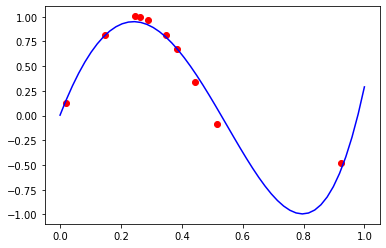

In [251]:
m4=Model4()
m4.trainModel(100000)
m4.testModel()
m4.drawPredictionLine()

In [152]:
class Model5:
    def __init__(self):
        self.w05= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w15= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w25= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w35= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w45= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w55= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
      
    def forward(self,x):
        return self.w05 + self.w15 * pow(x,1) + self.w25 * pow(x,2) + self.w35 * pow(x,3) +self.w45 * pow(x,4)+ self.w55 * pow(x,5)

    def forward1(self,x):
        return self.w05.data + self.w15.data * pow(x,1) + self.w25.data * pow(x,2) + self.w35.data * pow(x,3) + self.w45.data * pow(x,4) + self.w55.data * pow(x,5)

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w05.data = self.w05.data - 0.01 * self.w05.grad.data
                self.w15.data = self.w15.data - 0.01 * self.w15.grad.data
                self.w25.data = self.w25.data - 0.01 * self.w25.grad.data
                self.w35.data = self.w35.data - 0.01 * self.w35.grad.data
                self.w45.data = self.w45.data - 0.01 * self.w45.grad.data
                self.w55.data = self.w55.data - 0.01 * self.w55.grad.data
                
                self.w05.grad.data.zero_()
                self.w15.grad.data.zero_()
                self.w25.grad.data.zero_()
                self.w35.grad.data.zero_()
                self.w45.grad.data.zero_()
                self.w55.grad.data.zero_()
                #print("\tgrad: ", x_val, y_val, grad)
                
                # After training
                #print("predict (after training)", self.forward(4))
            
         
        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss)

        
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            
    def drawPredictionLine(self):

        pl.scatter(x_test, y_test, color = 'red')
        yp=self.forward1(X_Line_Space)
        pl.plot(X_Line_Space,yp , color = 'blue')
        pl.xlabel("X_test")
        pl.ylabel("y_test")

In [153]:
m5=Model5()
m5.trainModel(100)
m5.testModel()


Final train Loss  tensor([0.2058], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.1264], grad_fn=<DivBackward0>)


In [156]:
class Model6:
    def __init__(self):
        self.w06= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w16= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w26= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w36= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w46= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w56= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w66= Variable(torch.Tensor([1.0]),  requires_grad=True)

        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w06 + self.w16 * pow(x,1) + self.w26 * pow(x,2) + self.w36 * pow(x,3) +self.w46 * pow(x,4)+ self.w56 * pow(x,5)+ self.w66 * pow(x,6)

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w06.data = self.w06.data - 0.01 * self.w06.grad.data
                self.w16.data = self.w16.data - 0.01 * self.w16.grad.data
                self.w26.data = self.w26.data - 0.01 * self.w26.grad.data
                self.w36.data = self.w36.data - 0.01 * self.w36.grad.data
                self.w46.data = self.w46.data - 0.01 * self.w46.grad.data
                self.w56.data = self.w56.data - 0.01 * self.w56.grad.data
                self.w66.data = self.w66.data - 0.01 * self.w66.grad.data
                
                self.w06.grad.data.zero_()
                self.w16.grad.data.zero_()
                self.w26.grad.data.zero_()
                self.w36.grad.data.zero_()
                self.w46.grad.data.zero_()
                self.w56.grad.data.zero_()
                self.w66.grad.data.zero_()
                
        self.trainloss=self.trainloss/len(y_train)
        print("Train Loss ",self.trainloss)

    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            

In [157]:
m6=Model6()
m6.trainModel(100)
m6.testModel()


Train Loss  tensor([0.1888], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.1259], grad_fn=<DivBackward0>)


In [161]:
class Model7:
    def __init__(self):
        self.w07= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w17= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w27= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w37= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w47= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w57= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w67= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w77= Variable(torch.Tensor([1.0]),  requires_grad=True)

        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w07 + self.w17 * pow(x,1) + self.w27 * pow(x,2) + self.w37 * pow(x,3) +self.w47 * pow(x,4)+ self.w57 * pow(x,5)+ self.w67 * pow(x,6)+ self.w77 * pow(x,7)

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w07.data = self.w07.data - 0.01 * self.w07.grad.data
                self.w17.data = self.w17.data - 0.01 * self.w17.grad.data
                self.w27.data = self.w27.data - 0.01 * self.w27.grad.data
                self.w37.data = self.w37.data - 0.01 * self.w37.grad.data
                self.w47.data = self.w47.data - 0.01 * self.w47.grad.data
                self.w57.data = self.w57.data - 0.01 * self.w57.grad.data
                self.w67.data = self.w67.data - 0.01 * self.w67.grad.data
                self.w77.data = self.w77.data - 0.01 * self.w77.grad.data
                
                self.w07.grad.data.zero_()
                self.w17.grad.data.zero_()
                self.w27.grad.data.zero_()
                self.w37.grad.data.zero_()
                self.w47.grad.data.zero_()
                self.w57.grad.data.zero_()
                self.w67.grad.data.zero_()
                self.w77.grad.data.zero_()
        
        self.trainloss=self.trainloss/len(y_train)
        print("Train loss ",self.trainloss)              
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            

In [162]:
m7=Model7()
m7.trainModel(100)
m7.testModel()


Train loss  tensor([0.1680], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.1251], grad_fn=<DivBackward0>)


In [163]:
class Model8:
    def __init__(self):
        self.w08= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w18= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w28= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w38= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w48= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w58= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w68= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w78= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w88= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w08 + self.w18 * pow(x,1) + self.w28 * pow(x,2) + self.w38 * pow(x,3) +self.w48 * pow(x,4)+ self.w58 * pow(x,5)+ self.w68 * pow(x,6)+ self.w78 * pow(x,7)+ self.w88 * pow(x,8)

    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w08.data = self.w08.data - 0.01 * self.w08.grad.data
                self.w18.data = self.w18.data - 0.01 * self.w18.grad.data
                self.w28.data = self.w28.data - 0.01 * self.w28.grad.data
                self.w38.data = self.w38.data - 0.01 * self.w38.grad.data
                self.w48.data = self.w48.data - 0.01 * self.w48.grad.data
                self.w58.data = self.w58.data - 0.01 * self.w58.grad.data
                self.w68.data = self.w68.data - 0.01 * self.w68.grad.data
                self.w78.data = self.w78.data - 0.01 * self.w78.grad.data
                self.w88.data = self.w88.data - 0.01 * self.w88.grad.data

                
                self.w08.grad.data.zero_()
                self.w18.grad.data.zero_()
                self.w28.grad.data.zero_()
                self.w38.grad.data.zero_()
                self.w48.grad.data.zero_()
                self.w58.grad.data.zero_()
                self.w68.grad.data.zero_()
                self.w78.grad.data.zero_()
                self.w88.grad.data.zero_()

                
                #print("\tgrad: ", x_val, y_val, grad)
                
                # After training
                #print("predict (after training)", self.forward(4))
            #self.trainloss=l/len(y_train)
        
        
        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss)
        
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            


In [164]:
m8=Model8()
m8.trainModel(100)
m8.testModel()


Final train Loss  tensor([0.1474], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.1241], grad_fn=<DivBackward0>)


In [165]:
class Model9:
    def __init__(self):
        self.w09= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w19= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w29= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w39= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w49= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w59= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w69= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w79= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w89= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w99= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.testloss=0
        self.trainloss=0
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w09 + self.w19 * pow(x,1) + self.w29 * pow(x,2) + self.w39 * pow(x,3) +self.w49 * pow(x,4)+ self.w59 * pow(x,5)+ self.w69 * pow(x,6)+ self.w79 * pow(x,7)+ self.w89 * pow(x,8)+ self.w99 * pow(x,9)

    def forward1(self,x):
        return self.w09.data + self.w19.data * pow(x,1) + self.w29.data * pow(x,2) + self.w39.data * pow(x,3) +self.w49.data * pow(x,4)+ self.w59.data * pow(x,5)+ self.w69.data * pow(x,6)+ self.w79.data * pow(x,7)+ self.w89.data * pow(x,8)+ self.w99.data * pow(x,9)


    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = self.loss(x_val, y_val)
                self.trainloss=self.trainloss+l
                l.backward()
                self.w09.data = self.w09.data - 0.1 * self.w09.grad.data
                self.w19.data = self.w19.data - 0.1 * self.w19.grad.data
                self.w29.data = self.w29.data - 0.1 * self.w29.grad.data
                self.w39.data = self.w39.data - 0.1 * self.w39.grad.data
                self.w49.data = self.w49.data - 0.1 * self.w49.grad.data
                self.w59.data = self.w59.data - 0.1 * self.w59.grad.data
                self.w69.data = self.w69.data - 0.1 * self.w69.grad.data
                self.w79.data = self.w79.data - 0.1 * self.w79.grad.data
                self.w89.data = self.w89.data - 0.1 * self.w89.grad.data
                self.w99.data = self.w99.data - 0.1 * self.w99.grad.data

                
                self.w09.grad.data.zero_()
                self.w19.grad.data.zero_()
                self.w29.grad.data.zero_()
                self.w39.grad.data.zero_()
                self.w49.grad.data.zero_()
                self.w59.grad.data.zero_()
                self.w69.grad.data.zero_()
                self.w79.grad.data.zero_()
                self.w89.grad.data.zero_()
                self.w99.grad.data.zero_()
                
                #print("\tgrad: ", x_val, y_val, grad)
                
                # After training
                #print("predict (after training)", self.forward(4))
        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss)
        
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+self.loss(x_t,y_t)
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            
    def drawPredictionLine(self):
        #x_test1=sorted(x_test)
        pl.scatter(x_test, y_test, color = 'red')
        #ls=self.y_predicted.numpy()
        y_p=self.forward1(X_Line_Space)
        
        pl.plot(X_Line_Space, y_p, color = 'blue')
        pl.xlabel("X_test")
        pl.ylabel("y_test")

Final train Loss  tensor([0.0005], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.0011], grad_fn=<DivBackward0>)


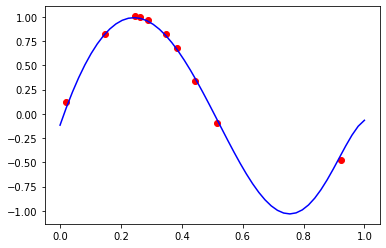

In [166]:
m9=Model9()
m9.trainModel(100000)
m9.testModel()
m9.drawPredictionLine()

In [169]:
#https://stackoverflow.com/questions/58053684/how-to-create-basic-table-in-python
import pandas as pd  

df = pd.DataFrame({'M0': [m0.w00.data,0,0,0,0,0,0,0,0,0], 
                   'M1': [m1.w01.data,m1.w11.data,0,0,0,0,0,0,0,0],
                   'M3': [m3.w03.data,m3.w13.data,m3.w23.data,m3.w33.data,0,0,0,0,0,0],
                   'M9': [m9.w09.data,m9.w19.data,m9.w29.data,m9.w39.data,m9.w49.data,m9.w59.data,m9.w69.data,m9.w79.data,m9.w89.data,m9.w99.data],
                   })
df.index = ['w0', 'w1','w2','w3','w4','w5','w6','w7','w8','w9']

df

,M0,M1,M3,M9
w0,[tensor(0.1767)],[tensor(0.8546)],[tensor(-0.0330)],[tensor(-0.1174)]
w1,0,[tensor(-1.4351)],[tensor(10.1807)],[tensor(9.1127)]
w2,0,0,[tensor(-29.9114)],[tensor(-18.0947)]
w3,0,0,[tensor(19.7983)],[tensor(-4.6791)]
w4,0,0,0,[tensor(5.9045)]
w5,0,0,0,[tensor(8.1844)]
w6,0,0,0,[tensor(5.6722)]
w7,0,0,0,[tensor(1.6353)]
w8,0,0,0,[tensor(-2.2870)]
w9,0,0,0,[tensor(-5.3979)]


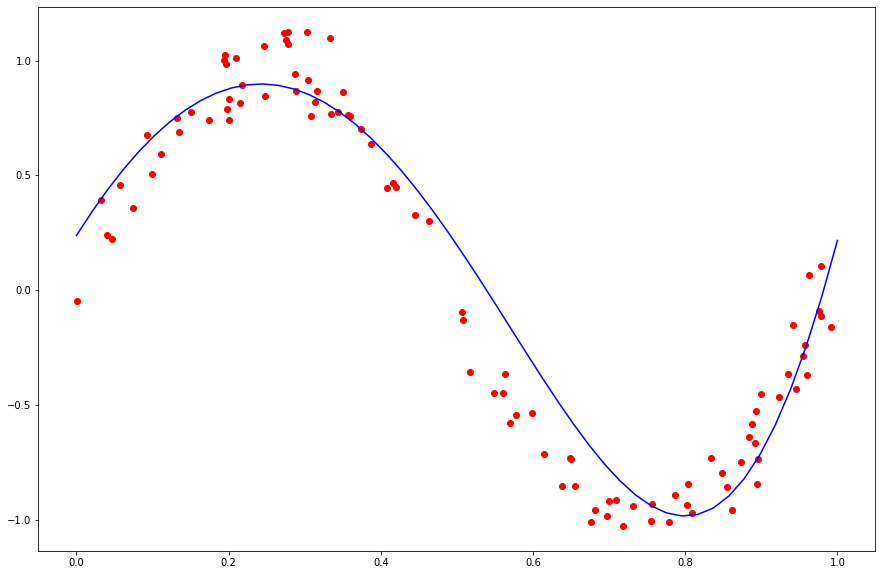

In [255]:
import numpy as np
import math

import matplotlib.pyplot as pl

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

N100 = np.random.normal(0, 1, 100)

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
X100 = np.random.uniform(0,1,100)

#https://www.w3schools.com/python/ref_math_pi.asp
#https://www.geeksforgeeks.org/python-math-sin-function/
Y100=[]
for i in range (0,100):
    temp_y=math.sin(2*(math.pi)*X100[i]) + 0.1 * N100[i]
    Y100.append(temp_y)
pl.figure(figsize=(15,10))
pl.scatter(X100, Y100, color = 'red')
y_p=m9.forward1(X_Line_Space)
        
pl.plot(X_Line_Space, y_p, color = 'blue')
pl.xlabel("X_test")
pl.ylabel("y_test")

Text(0, 0.5, 'Error')

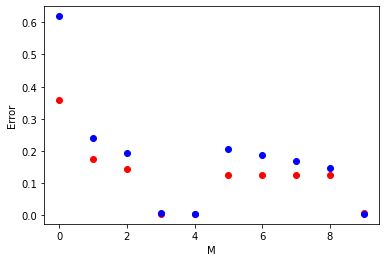

In [268]:
trainloss=[]
testloss=[]

trainloss.append(m0.trainloss.data)
testloss.append(m0.testloss.data)

trainloss.append(m1.trainloss.data)
testloss.append(m1.testloss.data)

trainloss.append(m2.trainloss.data)
testloss.append(m2.testloss.data)

trainloss.append(m3.trainloss.data)
testloss.append(m3.testloss.data)

trainloss.append(m4.trainloss.data)
testloss.append(m4.testloss.data)

trainloss.append(m5.trainloss.data)
testloss.append(m5.testloss.data)

trainloss.append(m6.trainloss.data)
testloss.append(m6.testloss.data)

trainloss.append(m7.trainloss.data)
testloss.append(m7.testloss.data)

trainloss.append(m8.trainloss.data)
testloss.append(m8.testloss.data)

trainloss.append(m9.trainloss.data)
testloss.append(m9.testloss.data)
model=[0,1,2,3,4,5,6,7,8,9]

pl.scatter(model, testloss, color = 'red')
pl.scatter(model, trainloss, color = 'blue')
pl.xlabel("M")
pl.ylabel("Error")

In [237]:
class Model9Lambda:
    def __init__(self,lambdavar):
        self.w09= Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value
        self.w19= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w29= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w39= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w49= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w59= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w69= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w79= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w89= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.w99= Variable(torch.Tensor([1.0]),  requires_grad=True)
        self.testloss=0
        self.trainloss=0
        self.lambdavar=lambdavar
        self.y_predicted=[]
        
    #0 degree linear regression
    def forward(self,x):
        return self.w09 + self.w19 * pow(x,1) + self.w29 * pow(x,2) + self.w39 * pow(x,3) +self.w49 * pow(x,4)+ self.w59 * pow(x,5)+ self.w69 * pow(x,6)+ self.w79 * pow(x,7)+ self.w89 * pow(x,8)+ self.w99 * pow(x,9)

    def forward1(self,x):
        return self.w09.data + self.w19.data * pow(x,1) + self.w29.data * pow(x,2) + self.w39.data * pow(x,3) + self.w49.data * pow(x,4)+ self.w59.data * pow(x,5)+ self.w69.data * pow(x,6)+ self.w79.data * pow(x,7)+ self.w89.data * pow(x,8)+ self.w99.data * pow(x,9)


    # Loss function
    def loss(self,x, y):
        y_pred = self.forward(x)
        return (y_pred-y) * (y_pred-y)  
    
    def trainModel(self,epochrange):
        # Training loop
        for epoch in range(epochrange):
            self.trainloss=0
            for x_val, y_val in zip(x_train, y_train):                
                l = 0.5* self.loss(x_val, y_val) + 0.5 * self.lambdavar * (pow(self.w09.data,2) + pow(self.w19.data,2) + pow(self.w29.data,2) + pow(self.w39.data,2) + pow(self.w49.data,2) + pow(self.w59.data,2) + pow(self.w69.data,2)+ pow(self.w79.data,2) + pow(self.w89.data,2) + pow(self.w99.data,2))
                self.trainloss=self.trainloss+l
                l.backward()
                self.w09.data = self.w09.data - 0.01 * self.w09.grad.data
                self.w19.data = self.w19.data - 0.01 * self.w19.grad.data
                self.w29.data = self.w29.data - 0.01 * self.w29.grad.data
                self.w39.data = self.w39.data - 0.01 * self.w39.grad.data
                self.w49.data = self.w49.data - 0.01 * self.w49.grad.data
                self.w59.data = self.w59.data - 0.01 * self.w59.grad.data
                self.w69.data = self.w69.data - 0.01 * self.w69.grad.data
                self.w79.data = self.w79.data - 0.01 * self.w79.grad.data
                self.w89.data = self.w89.data - 0.01 * self.w89.grad.data
                self.w99.data = self.w99.data - 0.01 * self.w99.grad.data

                
                self.w09.grad.data.zero_()
                self.w19.grad.data.zero_()
                self.w29.grad.data.zero_()
                self.w39.grad.data.zero_()
                self.w49.grad.data.zero_()
                self.w59.grad.data.zero_()
                self.w69.grad.data.zero_()
                self.w79.grad.data.zero_()
                self.w89.grad.data.zero_()
                self.w99.grad.data.zero_()
                
                #print("\tgrad: ", x_val, y_val, grad)
                
                # After training
                #print("predict (after training)", self.forward(4))
        self.trainloss=self.trainloss/len(y_train)
        print("Final train Loss ",self.trainloss)
        
    def testModel(self):
        y_p=0
        for x_t,y_t in zip(x_test,y_test):
            y_p=self.forward(y_t)
            y_p1=y_p.detach().numpy()
            self.y_predicted.append(y_p1[0])
            self.testloss=self.testloss+ 0.5 * self.loss(x_t,y_t) + 0.5 * self.lambdavar * (pow(self.w09.data,2) + pow(self.w19.data,2) + pow(self.w29.data,2) + pow(self.w39.data,2) + pow(self.w49.data,2) + pow(self.w59.data,2) + pow(self.w69.data,2)+ pow(self.w79.data,2) + pow(self.w89.data,2) + pow(self.w99.data,2))
        
        self.testloss=self.testloss/len(y_test)
        print("Final test Loss ",self.testloss)
            
    def drawPredictionLine(self):
        #x_test1=sorted(x_test)
        pl.scatter(x_test, y_test, color = 'red')
        #ls=self.y_predicted.numpy()
        y_p=self.forward1(X_Line_Space)
        
        pl.plot(X_Line_Space, y_p, color = 'blue')
        #pl.text(0.8,0.75,"M=0")

Final train Loss  tensor([11.8803], grad_fn=<DivBackward0>)
Final test Loss  tensor([6.0231], grad_fn=<DivBackward0>)


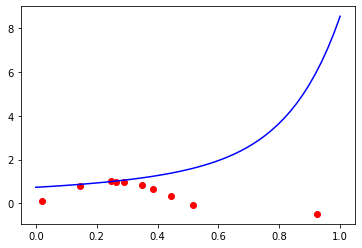

In [261]:
m91=Model9Lambda(1)
m91.trainModel(1)
m91.testModel()
m91.drawPredictionLine()

Final train Loss  tensor([0.8865], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.5254], grad_fn=<DivBackward0>)


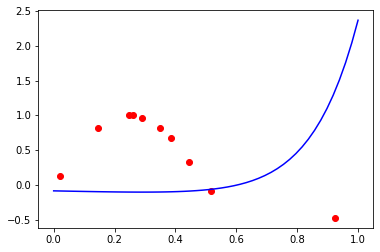

In [263]:
m92=Model9Lambda(1/10)
m92.trainModel(10)
m92.testModel()
m92.drawPredictionLine()

Final train Loss  tensor([0.0975], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.0747], grad_fn=<DivBackward0>)


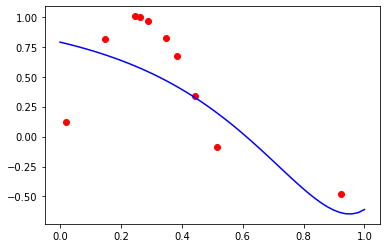

In [264]:
m93=Model9Lambda(1/100)
m93.trainModel(100)
m93.testModel()
m93.drawPredictionLine()

Final train Loss  tensor([0.0394], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.0695], grad_fn=<DivBackward0>)


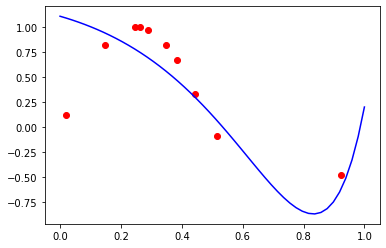

In [265]:
m94=Model9Lambda(1/1000)
m94.trainModel(1000)
m94.testModel()
m94.drawPredictionLine()

Final train Loss  tensor([0.0192], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.0317], grad_fn=<DivBackward0>)


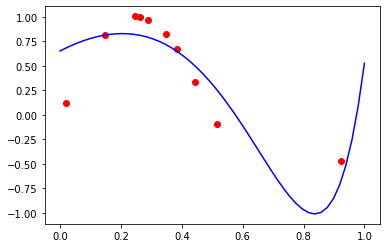

In [266]:
m95=Model9Lambda(1/10000)
m95.trainModel(10000)
m95.testModel()
m95.drawPredictionLine()

Final train Loss  tensor([0.0179], grad_fn=<DivBackward0>)
Final test Loss  tensor([0.0304], grad_fn=<DivBackward0>)


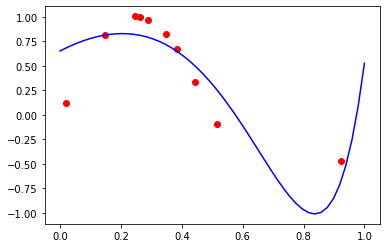

In [243]:
m96=Model9Lambda(1/100000)
m96.trainModel(10000)
m96.testModel()
m96.drawPredictionLine()

[tensor([14.4540]), tensor([1.4726]), tensor([0.1745]), tensor([0.1012]), tensor([0.0317]), tensor([0.0304])]


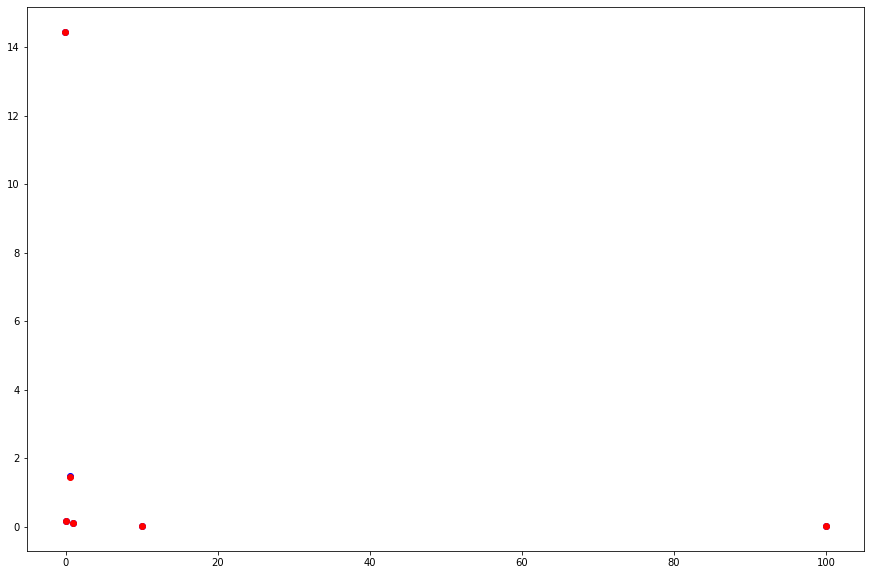

In [259]:
trainError=[]
testError=[]

trainError.append(m91.trainloss.data)
trainError.append(m92.trainloss.data)
trainError.append(m93.trainloss.data)
trainError.append(m94.trainloss.data)
trainError.append(m95.trainloss.data)
trainError.append(m96.trainloss.data)

testError.append(m91.testloss.data)
testError.append(m92.testloss.data)
testError.append(m93.testloss.data)
testError.append(m94.testloss.data)
testError.append(m95.testloss.data)
testError.append(m96.testloss.data)

error=[-0.1,0.5,0,1,10,100]
pl.figure(figsize=(15,10))
pl.scatter(error, testError, color = 'blue')
pl.scatter(error, trainError, color = 'red')
print(testError)

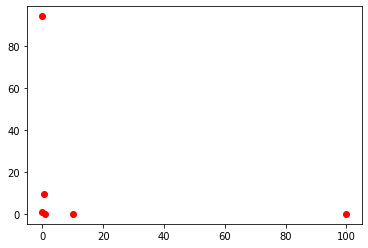